In [31]:
# IMPORTING NECESSARY LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
print (pd)

<module 'pandas' from 'C:\\Users\\user\\ANACONDA\\Lib\\site-packages\\pandas\\__init__.py'>


In [27]:
print (plt)

<module 'matplotlib.pyplot' from 'C:\\Users\\user\\ANACONDA\\Lib\\site-packages\\matplotlib\\pyplot.py'>


In [28]:
print (sns)

<module 'seaborn' from 'C:\\Users\\user\\ANACONDA\\Lib\\site-packages\\seaborn\\__init__.py'>


In [29]:
# SETTING STYLE FOR SEABORN
sns.set(style="whitegrid")

In [4]:
# LOADING THE UNEMPLOYMENT DATASET FOR USE
# replace 'data.csv' with your file path
data = pd.read_csv('Unemployment.csv')  

In [32]:
#VIEWING THE FIRST FEW ROWS OF  UNEMPLOYMENT DATASET
Unemployment = pd.read_csv('Unemployment.csv')  
Unemployment

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# CLEANING COLUMN NAMES BY STRIPPING EXTRA SPACES IN THE UNEMPLOYMENT DATASET
Unemployment.columns = Unemployment.columns.str.strip()


In [34]:
# CLEANING DATA : WE REMOVE LEADING/TRAILING SPACES IN ALL ENTRIES IN THE UNEMPLOYMENT DATASET
Unemployment = Unemployment.applymap(lambda x: x.strip() if isinstance(x, str) else x)



C:\Users\user\AppData\Local\Temp\ipykernel_10572\2818160651.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Unemployment = Unemployment.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [35]:
# PRINTING THE HAEDERS OF THE UNEMPLOYMENT DATASET
print(Unemployment.head())

           Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-05-2019   Monthly                             3.65   
1  Andhra Pradesh  30-06-2019   Monthly                             3.05   
2  Andhra Pradesh  31-07-2019   Monthly                             3.75   
3  Andhra Pradesh  31-08-2019   Monthly                             3.32   
4  Andhra Pradesh  30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  


In [11]:
# CHECKING FOR MISSING VALUES IN THE UNEMPLOYMENT DATA SET
print("\nMISSING VALUES IN EACH COLUMN:")
print(Unemployment.isnull().sum())


MISSING VALUES IN EACH COLUMN:
Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64


In [36]:
# CONVERTING 'DATE' COLUMN TO DATETIME FORMAT IN THE UNEMPLOYMENT DATASET
Unemployment['Date'] = pd.to_datetime(Unemployment['Date'], format='%d-%m-%Y')


In [37]:
# WE THEN DROP ROWS WITH MISSING VALUES IN THE UNEMPLOYMENT DATASET 
Unemployment = Unemployment.dropna()



C:\Users\user\AppData\Local\Temp\ipykernel_10572\2173744108.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_unemployment.values, y=avg_unemployment.index, palette='viridis')


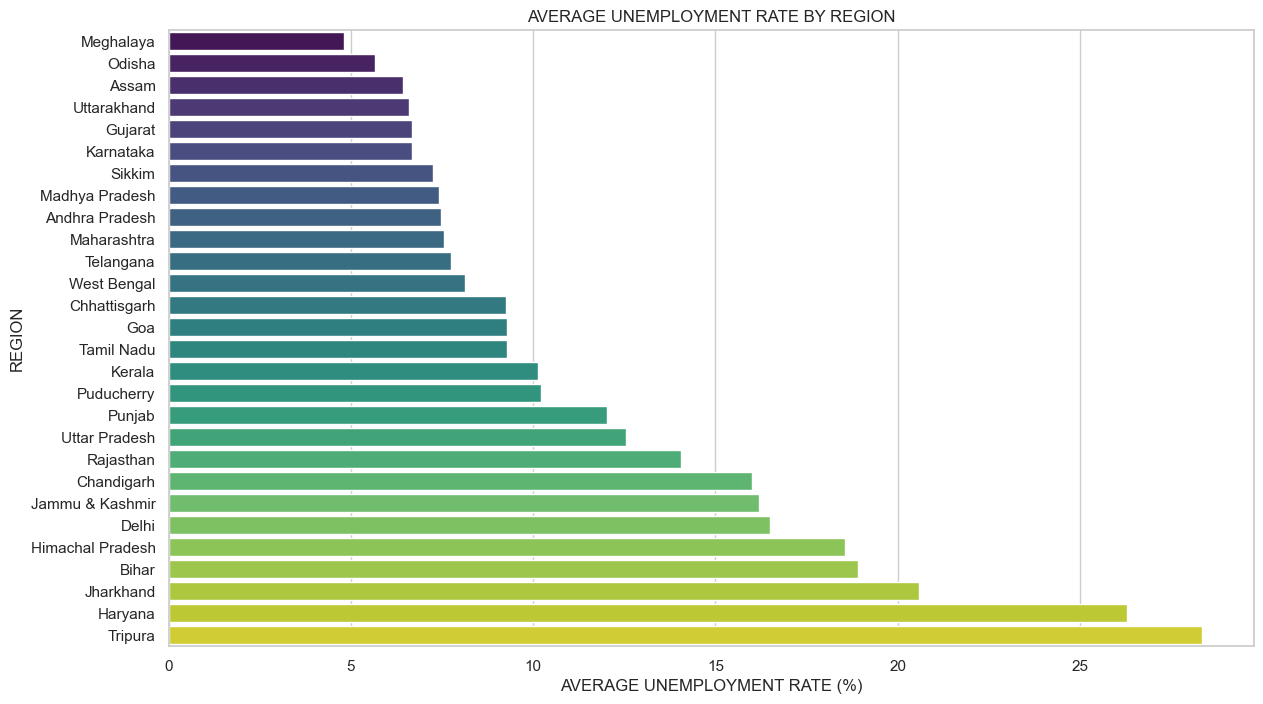

In [38]:
# WE THEN ANALYZE THE UNEMPLOYMENT RATE BY REGION USING BAR CHART
plt.figure(figsize=(14, 8))
avg_unemployment = Unemployment.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()
sns.barplot(x=avg_unemployment.values, y=avg_unemployment.index, palette='viridis')
plt.title('AVERAGE UNEMPLOYMENT RATE BY REGION')
plt.xlabel('AVERAGE UNEMPLOYMENT RATE (%)')
plt.ylabel('REGION')
plt.show()


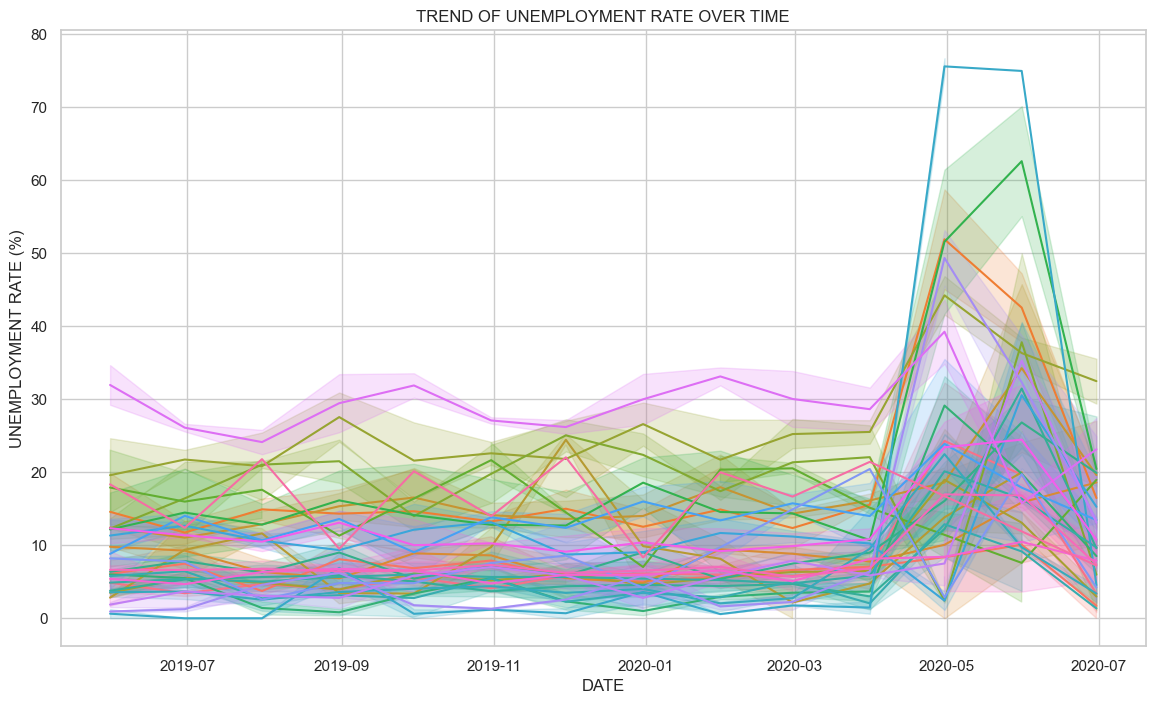

In [40]:
# AFTER THAT WE PLOT THE TREND OF UNEMPLOYMENT RATE OVER TIME FOR LL THE REGIONS IN INDIA
plt.figure(figsize=(14, 8))
sns.lineplot(data=Unemployment, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', legend=False)
plt.title('TREND OF UNEMPLOYMENT RATE OVER TIME')
plt.xlabel('DATE')
plt.ylabel('UNEMPLOYMENT RATE (%)')
plt.show()

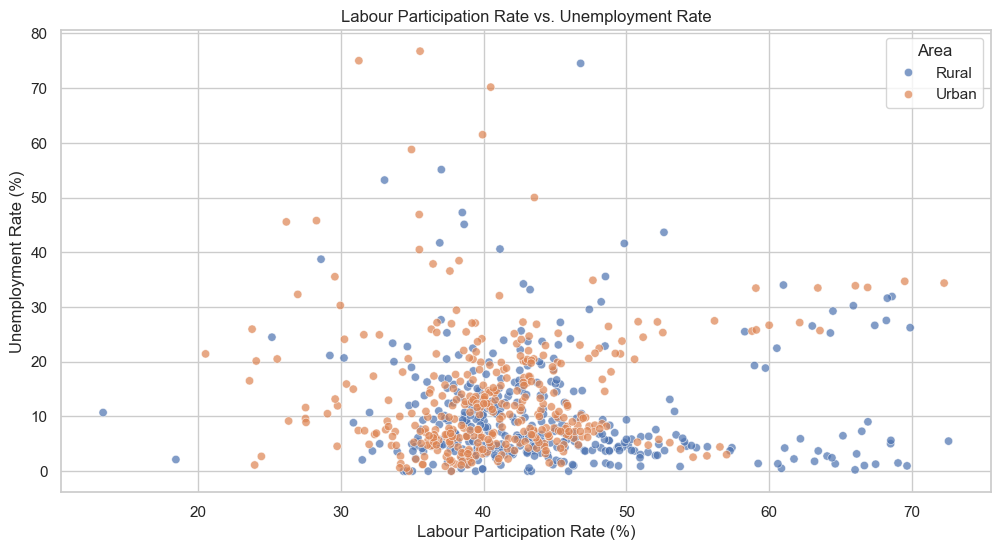

In [47]:
# WE THEN PLOT A SCATTER PLOT FOR LABOUR PARTICIPATION RATE VS UNEMPLOYMENT RATE 
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=Unemployment, 
    x='Estimated Labour Participation Rate (%)', 
    y='Estimated Unemployment Rate (%)', 
    hue='Area',
    alpha=0.7
)



plt.title('Labour Participation Rate vs. Unemployment Rate')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Area')
plt.show()

In [44]:
# WE THEN SAVE THE CLEANED UNEMPLOYMENT DATASET 
Unemployment.to_csv('Cleaned_Unemployment_Data.csv', index=False)
